# Build It Right Capstone Project

## Introduction

Welcome to **Build It Right**, an innovative application designed to enhance energy efficiency in residential buildings. This tool allows users to input various parameters related to their house design and provides actionable recommendations to improve energy efficiency based on predicted cooling and heating loads.

### Objectives

The primary goals of this project are to:
1. Analyze and clean a comprehensive dataset of residential buildings.
2. Perform exploratory data analysis to uncover key insights.
3. Engineer features that contribute to accurate energy consumption predictions.
4. Train and evaluate machine learning models to predict cooling and heating energy loads.
5. Provide recommendations on materials to reduce energy consumption.

In the sections that follow, we will delve into the details of the data preparation, analysis, modeling, and the insights derived from this process.

## Data Loading and Preparation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from pycaret.regression import *

In [ ]:
# Load the dataset
df = pd.read_csv('Houses_data.csv')

In [ ]:
# display the first few rows
df.head()

,Unnamed: 0,Width,Length,Height,Orientation,Window_Ratio,Skylight_Ratio,Area,Court_Length,Court_Width,Form_Factor,Surface_Volume_Ratio,Cooling_Load,Heating_Load,Total_Load,Image,ThreeD,Shape
0,0,30,30,8,0,0.1,0.1,1800,8.0,8.0,1.533333,0.383333,43.774540,1.559419,45.333959,WIDTH30_LENGTH30_HIGHT8_ORIENTATION0_WINDOWSRA...,WIDTH30_LENGTH30_HIGHT8_ORIENTATION0_WINDOWSRA...,Box
1,1,30,30,8,45,0.1,0.1,1800,8.0,8.0,1.533333,0.383333,43.647724,1.624867,45.272591,WIDTH40_LENGTH30_HIGHT8_ORIENTATION0_WINDOWSRA...,WIDTH40_LENGTH30_HIGHT8_ORIENTATION0_WINDOWSRA...,Box
2,2,30,30,8,90,0.1,0.1,1800,8.0,8.0,1.533333,0.383333,43.774540,1.559419,45.333959,WIDTH50_LENGTH30_HIGHT8_ORIENTATION0_WINDOWSRA...,WIDTH50_LENGTH30_HIGHT8_ORIENTATION0_WINDOWSRA...,Box
3,3,30,30,8,135,0.1,0.1,1800,8.0,8.0,1.533333,0.383333,43.647627,1.625249,45.272876,WIDTH60_LENGTH30_HIGHT8_ORIENTATION0_WINDOWSRA...,WIDTH60_LENGTH30_HIGHT8_ORIENTATION0_WINDOWSRA...,Box
4,4,30,30,8,180,0.1,0.1,1800,8.0,8.0,1.533333,0.383333,43.774540,1.559419,45.333959,WIDTH30_LENGTH40_HIGHT8_ORIENTATION0_WINDOWSRA...,WIDTH30_LENGTH40_HIGHT8_ORIENTATION0_WINDOWSRA...,Box


In [ ]:
# display shape of data
df.shape

(15356, 18)

In [ ]:
# Display summary statistics of the dataset
df.describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15356 entries, 0 to 15355
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            15356 non-null  int64  
 1   Width                 15356 non-null  int64  
 2   Length                15356 non-null  int64  
 3   Height                15356 non-null  int64  
 4   Orientation           15356 non-null  int64  
 5   Window_Ratio          15356 non-null  float64
 6   Skylight_Ratio        12284 non-null  float64
 7   Area                  15356 non-null  int64  
 8   Court_Length          12284 non-null  float64
 9   Court_Width           12284 non-null  float64
 10  Form_Factor           15356 non-null  float64
 11  Surface_Volume_Ratio  15356 non-null  float64
 12  Cooling_Load          15356 non-null  float64
 13  Heating_Load          15356 non-null  float64
 14  Total_Load            15356 non-null  float64
 15  Image              

## Data Cleaning

In [ ]:
# Check for missing values
df.isna().sum()

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Image', 'ThreeD','Total_Load','Surface_Volume_Ratio','Court_Length',	'Court_Width'])

,Width,Length,Height,Orientation,Window_Ratio,Skylight_Ratio,Area,Form_Factor,Cooling_Load,Heating_Load,Shape
0,30,30,8,0,0.1,0.1,1800,1.533333,43.774540,1.559419,Box
1,30,30,8,45,0.1,0.1,1800,1.533333,43.647724,1.624867,Box
2,30,30,8,90,0.1,0.1,1800,1.533333,43.774540,1.559419,Box
3,30,30,8,135,0.1,0.1,1800,1.533333,43.647627,1.625249,Box
4,30,30,8,180,0.1,0.1,1800,1.533333,43.774540,1.559419,Box


In [ ]:
# Fill missing values in 'Skylight_Ratio' with 0
df['Skylight_Ratio'].fillna(0, inplace=True)

## Feature Engineering

In [ ]:
df = pd.get_dummies(df, columns=['Shape'], dtype=int)

,Width,Length,Height,Orientation,Window_Ratio,Skylight_Ratio,Area,Form_Factor,Cooling_Load,Heating_Load,Shape_Box,Shape_L,Shape_O,Shape_U
0,30,30,8,0,0.1,0.1,1800,1.533333,43.774540,1.559419,1,0,0,0
1,30,30,8,45,0.1,0.1,1800,1.533333,43.647724,1.624867,1,0,0,0
2,30,30,8,90,0.1,0.1,1800,1.533333,43.774540,1.559419,1,0,0,0
3,30,30,8,135,0.1,0.1,1800,1.533333,43.647627,1.625249,1,0,0,0
4,30,30,8,180,0.1,0.1,1800,1.533333,43.774540,1.559419,1,0,0,0


## Exploratory Data Analysis (EDA)

In [ ]:
# Generate and visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

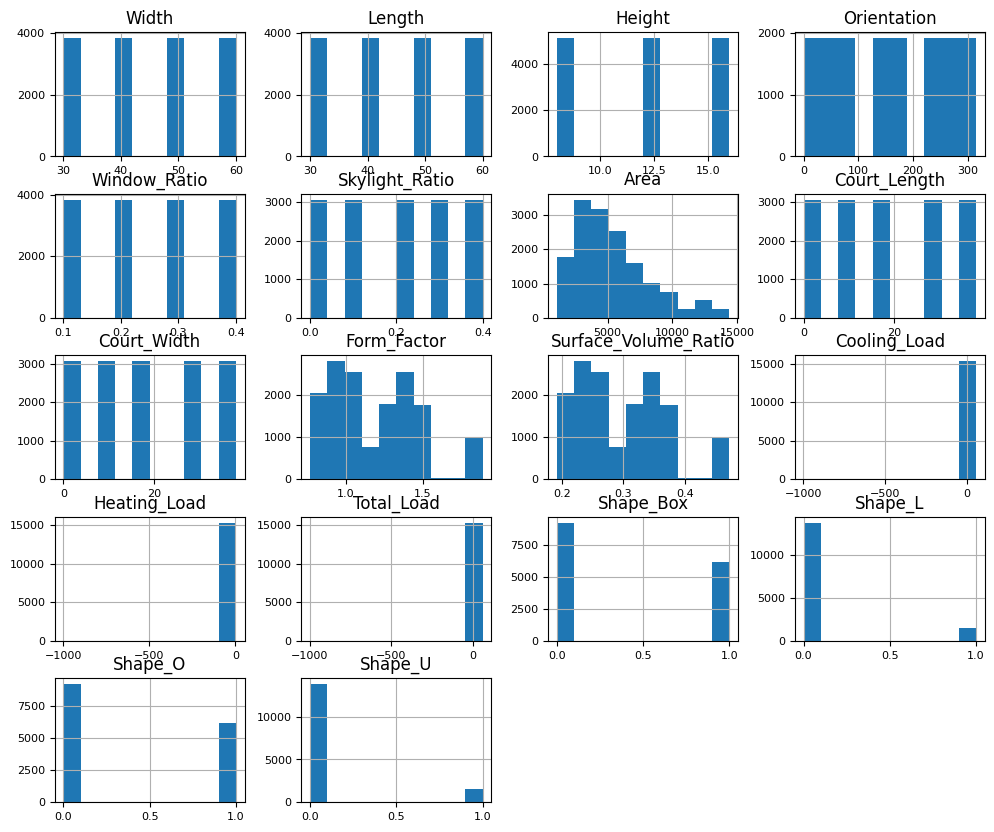

In [ ]:
# Visualize distributions of the dataset
df.hist(figsize=(12, 10), bins=10, xlabelsize=8, ylabelsize=8);

## Handling Outliers

In [ ]:
# Function to apply Box-Cox transformation
def boxcox_transform(df, column):
    # Shift values to be positive if necessary
    shifted_values = df[column] - df[column].min() + 1
    transformed_values, _ = boxcox(shifted_values)
    df[column] = transformed_values
    return df

# Apply Box-Cox transformation to Area
data = boxcox_transform(df, 'Area')

In [ ]:
# Function to cap outliers
def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply capping for 'Cooling_Load' and 'Heating_Load'
for column in ['Cooling_Load', 'Heating_Load']:
    data = cap_outliers(df, column)

In [ ]:
# Function to detect outliers
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Plot distributions and detect outliers after transformations
for column in ['Area', 'Cooling_Load', 'Heating_Load','Form_Factor']:
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    print(f'Number of outliers in {column} after Transformation: {len(outliers)}')

Number of outliers in Area after Transformation: 32
Number of outliers in Cooling_Load after Transformation: 0
Number of outliers in Heating_Load after Transformation: 0
Number of outliers in Form_Factor after Transformation: 0


## Feature and Target Separation

In [ ]:
# Separate the features and targets
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y_heating = df['Heating_Load']
y_cooling = df['Cooling_Load']

## Modeling

### Heating Load (AUTO ML)

In [ ]:
# Setup PyCaret for Heating Load with Robust Scaler
reg_setup_heating = setup(
    data=pd.concat([X, y_heating], axis=1),
    target='Heating_Load',
    session_id=123,
    normalize=True,
    normalize_method='robust',
    verbose=True)

# Check the transformed data
transformed_data = get_config('X_train')
transformed_data.head()

# Compare models and select the best one for Heating Load
best_model_heating = compare_models()

# Tune the hyperparameters of the best model for Heating Load
tuned_model_heating = tune_model(best_model_heating)

# Finalize the model for Heating Load
final_model_heating = finalize_model(tuned_model_heating)

# Save the model for Heating Load
save_model(final_model_heating, 'final_model_heating_FINAL_2')

#### Hyperparameter Tuning for LightGBM Model (Heating Load)

In [ ]:
# Define parameter grid for tuning
param_grid_lightgbm = {
    'num_leaves': [20, 31, 40],
    'min_data_in_leaf': [20, 40, 60],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0]
}

# Tune the model with the new parameter grid
tuned_lightgbm_heating = tune_model(
    create_model('lightgbm'),
    custom_grid=param_grid_lightgbm,
    optimize='MAE'
)

# Save the tuned model
save_model(tuned_lightgbm_heating, 'tuned_model_heating_2')

### Cooling Load (AUTO ML)

In [ ]:
# Setup PyCaret for Cooling Load with Robust Scaler
reg_setup_cooling = setup(data=pd.concat([X, y_cooling], axis=1), target='Cooling_Load',
                          session_id=123, normalize=True, normalize_method='robust', verbose=True)

# Compare models
best_model_cooling = compare_models()

# Tune the best model
tuned_model_cooling = tune_model(best_model_cooling)

# Finalize the model
final_model_cooling = finalize_model(tuned_model_cooling)

# Save the final model
save_model(final_model_cooling, 'final_model_cooling_FINAL_2')

#### Hyperparameter Tuning for LightGBM Model (Cooling Load)

In [ ]:
# Define parameter grid for tuning
param_grid_lightgbm = {
    'num_leaves': [20, 31, 40],
    'min_data_in_leaf': [20, 40, 60],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0]
}

# Tune the model with the new parameter grid
tuned_lightgbm_cooling = tune_model(
    create_model('lightgbm'),
    custom_grid=param_grid_lightgbm,
    optimize='MAE'
)

# Save the tuned model
save_model(tuned_lightgbm_cooling, 'tuned_model_cooling_2')

## Model Evaluation

In [ ]:
# Evaluate the tuned model for Heating Load
results_heating = evaluate_model(tuned_lightgbm_heating)
print("Evaluation results for tuned LightGBM (Heating Load):")
print(results_heating)

# Evaluate the tuned model for Cooling Load
results_cooling = evaluate_model(tuned_lightgbm_cooling)
print("Evaluation results for tuned LightGBM (Cooling Load):")
print(results_cooling)

### Learning Curve Plotting

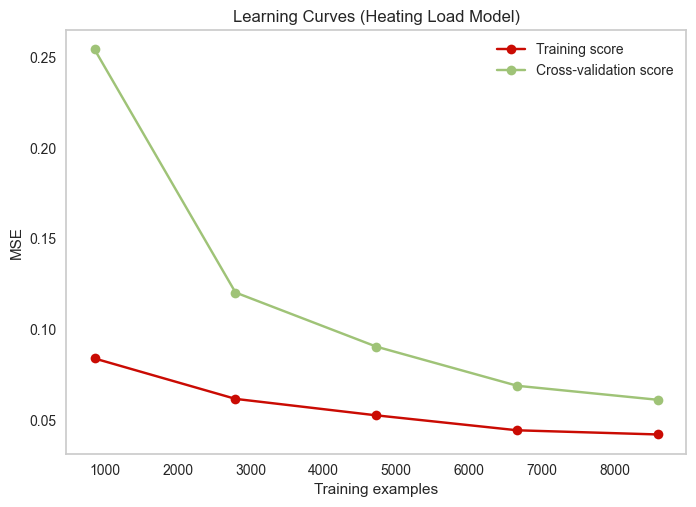

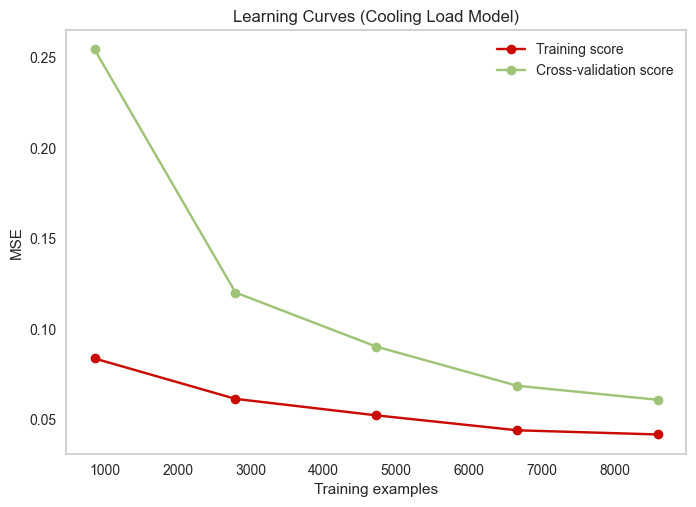

In [ ]:
# Function to plot learning curves
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Extract the training and test sets from PyCaret configuration
X_train_ff = get_config('X_train')
y_train_heating = get_config('y_train')
X_test_ff = get_config('X_test')
y_test_heating = get_config('y_test')

# Plot learning curve for the best heating load model
plot_learning_curve(final_model_heating, X_train_ff, y_train_heating, title='Learning Curves (Heating Load Model)')

X_train_cf = get_config('X_train')
y_train_cooling = get_config('y_train')
X_test_cf = get_config('X_test')
y_test_cooling = get_config('y_test')
plot_learning_curve(final_model_cooling, X_train_cf, y_train_cooling, title='Learning Curves (Cooling Load Model)')